<a href="https://colab.research.google.com/github/Iingxaki/MLA_RH/blob/main/ML4_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Radjamin Hukom**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [4]:
#example - you will replace this with the models you a  re actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [15]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [9]:
# prompt: Load the banknote_authentication.csv into a data frame named df.

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CS430/ML4_RH/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

In [ ]:
#You do not need this section for this notebook - you did this in last module's assignment.

### Splitting Data into Train/Test

In [11]:
# prompt: Create a data frame called X of your inputs that includes all columns except date and forgery.

X = df.drop(['forgery'], axis=1)
y = df.forgery

In [12]:
# prompt: Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [13]:
# prompt: Create a column transformer that will MinMax scale the numerical variables

numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to scale the numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ], remainder='passthrough')

In [16]:
# prompt: Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.

# Create a pipeline with the column transformer and the Decision Tree Classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

### Executing the Model

In [17]:
# prompt: Run the pipeline to fit the DecisionTreeClassification model.

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

### Evaluating Model

Precision: 0.99
Recall: 0.94
F1 Score: 0.97


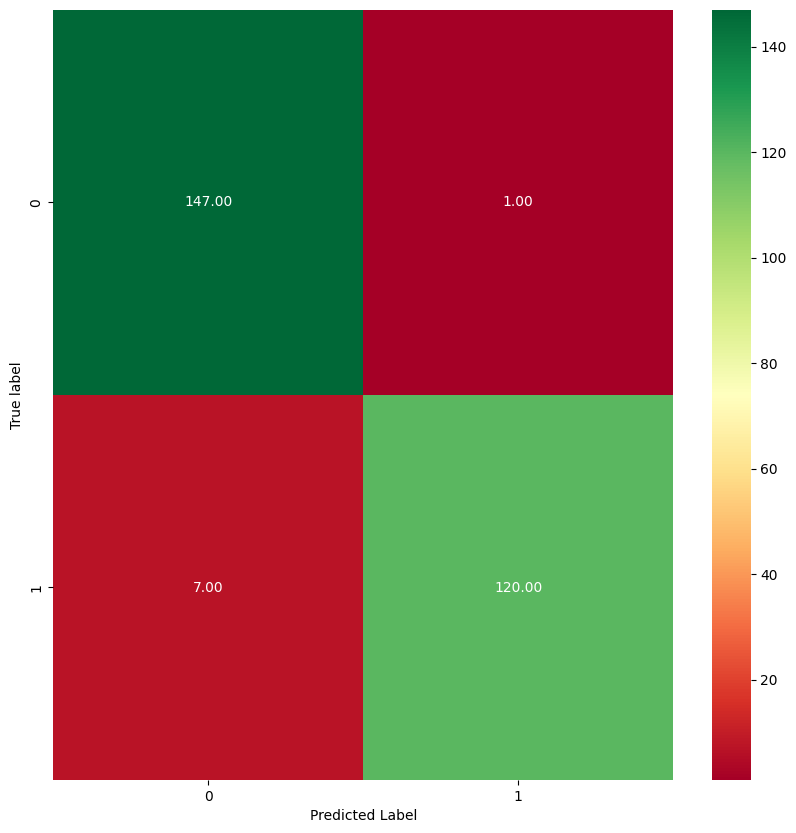

In [21]:
# prompt: Call the plot_cm function to generate the confusion matrix.
# Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


### Conclusion
.99 precision score means that it is 99% correct when identifying forgeries, which means there's a low chance for this model with this sample to identify false positives. The recall of .94 shows that out of all actual forgeries, it managed to identify .94 of them which is good, because in this scenario of identifying bank forgeries, we can tolerate false negatives more than false positives. This model is highly suitable for identifying bank forgeries.

### Reading the Data

In [23]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CS430/ML4_RH/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [24]:
# prompt: name columns as usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type

df.columns = ['date','usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']

In [25]:
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

### Splitting Data into Train/Test

In [26]:
# Create a data frame called X of your inputs that includes all columns except date and usage_kwh.
# Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.
# Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [27]:
# prompt: Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
# Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.

numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to scale numerical features and one-hot encode categorical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

# Create a pipeline with the column transformer and the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline([
    ('transformer', ct),
    ('regressor', DecisionTreeRegressor())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model (example using R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# You can also evaluate using other regression metrics like MSE or MAE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 1.00
Mean Squared Error: 2.00


### Executing the Model

In [28]:
# prompt: Run the pipeline to fit the DecisionTreeRegression.

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model (example using R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# You can also evaluate using other regression metrics like MSE or MAE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 1.00
Mean Squared Error: 2.18


### Evaluating Model

In [31]:
# prompt: Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
# Calculate the root mean squared error for both train and test.

# Make predictions on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate RMSE for training data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"RMSE for training data: {rmse_train:.2f}")

# Calculate RMSE for testing data
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE for testing data: {rmse_test:.2f}")

RMSE for training data: 0.00
RMSE for testing data: 1.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for training data: 0.00 suggests that my model fits the training data perfectly, which is a little too good to be true. This probably means that the model is being overfitted to the sample and not necessarily applicable to other situations.

RMSE for testing data: 1.48 shows the model's performance on unseen data, which is pretty high. there's probably some deviation between the predicted and actual values, which means the residuals are pretty high in general.

### Conclusion
the R-squared value of 1.00 further confirms what we got from the RMSE for training data: 0.00, which is that the model is overfitted to the sample data. the Mean Squared Error: 2.18 further confirms what we got from the RMSE for testing data: 1.48, which is that the model has some errors in predicting kwh usage with new data. This means that the model would benefit from further tuning to improve the model's generalization.